# Sparse matrices and graphs

- __SciPy sparse matrices__
- __Creating__
- __Sparse Linear Algebra__
- __Linear Equation Systems__
- __Eigenvalue Problems__
- __Graphs & Networks__

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [3]:
import scipy.sparse as sp
import scipy.sparse.linalg
import scipy.linalg as la
import numpy as np

In [5]:
import networkx as nx

![pic](pics/sparse-matrix-representations.png)

### Coordinate list format
* store lists of column & row indices together with a list of nonzero values.

In [6]:
values = [1, 2, 3, 4]
rows   = [0, 1, 2, 3]
cols   = [1, 3, 2, 0]

In [7]:
# coo_matrix() == coordinate list format
A = sp.coo_matrix((values, (rows, cols)), shape=[4, 4])
A.todense()

matrix([[0, 1, 0, 0],
        [0, 0, 0, 2],
        [0, 0, 3, 0],
        [4, 0, 0, 0]])

In [8]:
# various attributes
A.shape, A.size, A.dtype, A.ndim

((4, 4), 4, dtype('int64'), 2)

In [9]:
# nnz = number of non-zeros
# data = nonzero values
A.nnz, A.data, A.row, A.col

(4,
 array([1, 2, 3, 4]),
 array([0, 1, 2, 3], dtype=int32),
 array([1, 3, 2, 0], dtype=int32))

In [10]:
# convert to CSR (compressed sparse row) format)
# not as intuitive, but well suited for matrix math & linear algebra operations.
# CSR & CSC = main formats for sparse matrix math.
A = np.array([[1, 2, 0, 0], [0, 3, 4, 0], [0, 0, 5, 6], [7, 0, 8, 9]]); A

array([[1, 2, 0, 0],
       [0, 3, 4, 0],
       [0, 0, 5, 6],
       [7, 0, 8, 9]])

In [11]:
A = sp.csr_matrix(A)
A.data, A.indices, A.indptr

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 1, 2, 2, 3, 0, 2, 3], dtype=int32),
 array([0, 2, 4, 6, 9], dtype=int32))

### Functions for constructing sparse matrices
* Often more convenient to use __sp.sparse__ templates:
* __sp.eye__ (ones on diagonal)
* __sp.diags__ (spec'd pattern on diagonal)
* __sp.kron__  (kronecker tensor product of 2 sparse matrices)
* __sp.bmat__, __sp.vstack__, __sp.hstack__

In [12]:
N = 10

In [13]:
A = -2 * sp.eye(N) + sp.eye(N, k=1) + sp.eye(N, k=-1); A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements (3 diagonals) in DIAgonal format>

In [14]:
A.todense()

matrix([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

In [15]:
# matplot lib spy function for viewing sparse matrix data
fig, ax = plt.subplots()
ax.spy(A)
fig.savefig("ch10-sparse-matrix-1.pdf");

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../1acea6f6c115d0ec7a634ed0529287b9.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-01-16>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.6 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on 1acea6f6c115d0ec7a634ed0529287b9.log.




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../1acea6f6c115d0ec7a634ed0529287b9.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-01-16>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.6 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on 1acea6f6c115d0ec7a634ed0529287b9.log.




<Figure size 640x480 with 1 Axes>

* sparse matrices often associated with tensor products.
* use __sp.kron__ to compose sparse matrix from smaller components

In [16]:
B = sp.diags([1, 1], [-1, 1], shape=[3,3])
C = sp.kron(A,B)

fig, (ax_A, ax_B, ax_C) = plt.subplots(1,3,figsize=(12,4))
ax_A.spy(A)
ax_B.spy(B)
ax_C.spy(C)

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../1acea6f6c115d0ec7a634ed0529287b9.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-01-16>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.6 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on 1acea6f6c115d0ec7a634ed0529287b9.log.




<Figure size 1200x400 with 3 Axes>

### Sparse linear algebra
* use case: large matrices == not well suited to dense matrix designs
* __scipy.sparse.linalg__ is NOT equal to __scipy.linalg__ (example: dense eigenvalue solvers typically return ALL results; sparse eigenvalue solvers return a subset, typically smallest or largest results.)
* Typical use case: solving Ax=b (A = sparse matrix, x & b = dense vectors)
* __linalg__ has direct & iterative solvers
* __linalg__ also has matrix LU factorization methods (__splu__, __spilu__)

In [17]:
N = 10
A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format='csc'); A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

In [18]:
b = -np.ones(N); b

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [19]:
# direct solver, returns dense Numpy array:
sp.linalg.spsolve(A, b)

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [20]:
# to use dense solver, need to convert A to dense array first.
np.linalg.solve(A.todense(), b)

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

* N=100 is typical performance crossover point
![pic](pics/dense-vs-sparse.png)

* LU factorization; returns L & U factors; has method to solve LUx=b for given b.
* use case: solve Ax=b for multiple vectors b

In [21]:
# splu: returns object with L & U factors, and has solver method.
lu = sp.linalg.splu(A)

In [22]:
lu.L, lu.U

(<10x10 sparse matrix of type '<class 'numpy.float64'>'
 	with 20 stored elements in Compressed Sparse Column format>,
 <10x10 sparse matrix of type '<class 'numpy.float64'>'
 	with 20 stored elements in Compressed Sparse Column format>)

In [23]:
# now can solve LUx=b
lu.solve(b)

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [24]:
lu.perm_r, lu.perm_c

(array([0, 1, 2, 3, 4, 5, 6, 8, 7, 9], dtype=int32),
 array([0, 1, 2, 3, 4, 5, 6, 8, 7, 9], dtype=int32))

* LU factorization of A can introduce new nonzero elements in L & U (aka "fill-ins").
* LU factorization advantage is lost if number of fill-ins is large.
* Can reduce fill-ins by permuting rows & columns of A
    - so LU factorization is PrAPc = LU (Pr, Pc = row & column permutation matrices)
    - multiple methods available via "permc_spec" argument.
* Have to undo permutations to reconstruct A from lu.L, lu.U.

In [25]:
def sp_permute(A, perm_r, perm_c):
    M, N = A.shape
    
    # row permumation matrix
    Pr = sp.coo_matrix(
        (np.ones(M), (perm_r, np.arange(N)))).tocsr()
    
    # column permutation matrix
    Pc = sp.coo_matrix((np.ones(M), (np.arange(M), perm_c))).tocsr()

    return Pr.T * A * Pc.T

In [26]:
#lu.L * lu.U - A
lu.L * lu.U

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

In [27]:
sp_permute(lu.L * lu.U, lu.perm_r, lu.perm_c) - A # == 0

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Column format>

* Default direct sparse linear solver in SciPy uses __SuperLU__ package.
* __UMFPACK__ package is an alternative (not standard).
* __sp.spsolve__ interfaces to direct solvers, which does matrix factorization.
    - multiple solvers available:
    - __bigc__ (biconjugate gradient)
    - __biggstab__ (biconjugate gradient, stabilized)
    - __cg__ (conjugate gradient)
    - __gmres__ (general min residual)
    - __lgmres__ (loose general min residual)

In [28]:
x, info = sp.linalg.bicgstab(A,b); x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [29]:
x, info = sp.linalg.lgmres(A,b); x

/tmp/ipykernel_45983/1643016289.py:1: DeprecationWarning: scipy.sparse.linalg.lgmres called without specifying `atol`. The default value will change in the future. To preserve current behavior, set ``atol=tol``.
  x, info = sp.linalg.lgmres(A,b); x


array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

### Eigenvalue problems
* sparse eigenvalues ==> __sp.linalg.eigs()__
* singular-value problems ==> __sp.linalg.svds()__
* Real symmetric or complex hermitian matrices ==> __sp.linalg.eigsh()__
* return given number of eigenvalues & vectors (not all. default = 6)

In [30]:
# example: find four lowest eigenvalues for sparse matrix of 1D Poisson problem

A = sp.diags(
    [1, -2, 1], 
    [1, 0, -1], 
    shape=[10,10], 
    format='csc')

evals, evecs = sp.linalg.eigs(A, k=4, which='LM'); evals

# evals = array of eigenvalues
# evecs = array (Nxk); columns = eigenvectors corresponding to eigenvalues in evals

array([-3.91898595+0.j, -3.68250707+0.j, -3.30972147+0.j, -2.83083003+0.j])

In [31]:
# (dot product A & a column in evecs) == (same evecs column scaled by corr. eigenvalue)?
np.allclose(A.dot(evecs[:,0]), evals[0] * evecs[:,0])

True

In [32]:
# in this case, sparse A is symmetric.
# so we could use eigsh instead of eigs - returns real-valued eigenvalue array

evals, evecs = sp.linalg.eigsh(A, k=4, which='LM'); evals

array([-3.91898595, -3.68250707, -3.30972147, -2.83083003])

In [33]:
# change which='LM' (largest magnitude) to which='SM' (smallest)
# instead get smallest magnitude eigenvalues

evals, evecs = sp.linalg.eigsh(A, k=4, which='SM'); evals

array([-1.16916997, -0.69027853, -0.31749293, -0.08101405])

In [34]:
np.real(evals).argsort()

array([0, 1, 2, 3])

In [35]:
# helper function - returns sorted eigenvalues
def sp_eigs_sorted(A, k=6, which='SR'):
    evals, evecs = sp.linalg.eigs(A, k=k, which=which)
    idx = np.real(evals).argsort()
    return evals[idx], evecs[idx]

In [36]:
evals, evecs = sp_eigs_sorted(A, k=4, which='SM'); evals

array([-1.16916997+0.j, -0.69027853+0.j, -0.31749293+0.j, -0.08101405+0.j])

* Less trivial example: plot eigenvalue spectrum of the following sparse matrix:
* (1-x)M1 + xM2, as a function of x; M1, M2 = two random matrices.

In [37]:
N = 100
x_vec = np.linspace(0,1,50)
M1    = sp.rand(N,N,density=0.2)
M2    = sp.rand(N,N,density=0.2)

evals_mat = np.array(
    [sp_eigs_sorted((1-x)*M1 + x*M2, k=25)[0] for x in x_vec]
)

In [38]:
fix,ax = plt.subplots(figsize=(8,4))
for idx in range(evals_mat.shape[1]):
    ax.plot(x_vec, np.real(evals_mat[:,idx]), lw=0.5)
ax.set_xlabel(R"$x$", fontsize=16)
ax.set_ylabel(r"eig.vals. of $(1-x)M_1+M_2$", fontsize=16)

Text(0, 0.5, 'eig.vals. of $(1-x)M_1+M_2$')

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../1acea6f6c115d0ec7a634ed0529287b9.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-01-16>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.6 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on 1acea6f6c115d0ec7a634ed0529287b9.log.




<Figure size 800x400 with 1 Axes>

### An example of a matrix reording method: Reverse Cuthil McKee

In [39]:
perm = sp.csgraph.reverse_cuthill_mckee(A)
perm

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0], dtype=int32)

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.spy(A)
ax2.spy(sp_permute(A, perm, perm))

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../1acea6f6c115d0ec7a634ed0529287b9.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-01-16>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.6 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on 1acea6f6c115d0ec7a634ed0529287b9.log.




<Figure size 800x400 with 2 Axes>

### Performance comparison sparse/dense

In [41]:
# compare performance of solving Ax=b vs system size N,
# where A is the sparse matrix for the 1d poisson problem
import time

def setup(N):
    A = sp.diags([1,-2,1], [1,0,-1], shape=[N, N], format='csr')
    b = -np.ones(N)
    return A, A.todense(), b

reps = 10
N_vec = np.arange(2, 300, 1)
t_sparse = np.empty(len(N_vec))
t_dense = np.empty(len(N_vec))
for idx, N in enumerate(N_vec):
    A, A_dense, b = setup(N)
    t = time.time()
    for r in range(reps):
        x = np.linalg.solve(A_dense, b)
    t_dense[idx] = (time.time() - t)/reps
    t = time.time()
    for r in range(reps):
        #x = la.solve(A_dense, b)
        x = sp.linalg.spsolve(A, b, use_umfpack=True)
    t_sparse[idx] = (time.time() - t)/reps
    
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(N_vec, t_dense * 1e3, '.-', label="dense")
ax.plot(N_vec, t_sparse * 1e3, '.-', label="sparse")
ax.set_xlabel(r"$N$", fontsize=16)
ax.set_ylabel("elapsed time (ms)", fontsize=16)
ax.legend(loc=0)
fig.tight_layout()
fig.savefig("ch10-sparse-vs-dense.pdf")

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../1acea6f6c115d0ec7a634ed0529287b9.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-01-16>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.6 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on 1acea6f6c115d0ec7a634ed0529287b9.log.




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../1acea6f6c115d0ec7a634ed0529287b9.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-01-16>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.6 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on 1acea6f6c115d0ec7a634ed0529287b9.log.




<Figure size 800x400 with 1 Axes>

### Graphs & Networks
* sparse matrix use case: graphs as adjacency matrices
* __Scipy.sparse.csgraph__ module available
* __NetworkX__ library == more comprehensive

![pic](pics/networkx-ops.png)

In [ ]:
g = nx.MultiGraph()
g.add_node(1)
g.nodes()

In [ ]:
g.add_nodes_from([3, 4, 5])
g.nodes()

In [42]:
# add_edge connects nodes together
g.add_edge(1, 2)
g.edges()

NameError: name 'g' is not defined

In [43]:
g.add_edges_from([(3, 4), (5, 6)])
g.edges()

NameError: name 'g' is not defined

In [44]:
g.add_weighted_edges_from([(1, 3, 1.5), (3, 5, 2.5)])
g.edges(data=True)

NameError: name 'g' is not defined

In [45]:
g.add_weighted_edges_from([(6, 7, 1.5)])
g.nodes(), g.edges()

NameError: name 'g' is not defined

In [46]:
# let's build graph from Tokyo Metro dataset (JSON)
import numpy as np
import json

In [47]:
with open("tokyo-metro.json") as f:
    data = json.load(f)

# data contents: 
# travel times between stations (travel_times)
# possible xfer points to other lines (transfer)
# line color

In [62]:
data.keys()

dict_keys(['C', 'G', 'F', 'H', 'M', 'N', 'T', 'Y', 'Z'])

In [63]:
data["C"]

{'color': '#149848',
 'transfers': [['C3', 'F15'],
  ['C4', 'Z2'],
  ['C4', 'G2'],
  ['C7', 'M14'],
  ['C7', 'N6'],
  ['C7', 'G6'],
  ['C8', 'M15'],
  ['C8', 'H6'],
  ['C9', 'H7'],
  ['C9', 'Y18'],
  ['C11', 'T9'],
  ['C11', 'M18'],
  ['C11', 'Z8'],
  ['C12', 'M19'],
  ['C18', 'H21']],
 'travel_times': [['C1', 'C2', 2],
  ['C2', 'C3', 2],
  ['C3', 'C4', 1],
  ['C4', 'C5', 2],
  ['C5', 'C6', 2],
  ['C6', 'C7', 2],
  ['C7', 'C8', 1],
  ['C8', 'C9', 3],
  ['C9', 'C10', 1],
  ['C10', 'C11', 2],
  ['C11', 'C12', 2],
  ['C12', 'C13', 2],
  ['C13', 'C14', 2],
  ['C14', 'C15', 2],
  ['C15', 'C16', 2],
  ['C16', 'C17', 3],
  ['C17', 'C18', 3],
  ['C18', 'C19', 3]]}

In [64]:
# create a graph - iterate over each metro line dictionary

g = nx.Graph()

for line in data.values():
    g.add_weighted_edges_from(line["travel_times"])
    g.add_edges_from(line["transfers"])

In [66]:
# line xfer edges don't have weights.
# mark them by adding boolean attribute "transfer" to each edge

for n1, n2 in g.edges():
    g[n1][n2]["transfer"] = "weight" not in g[n1][n2]

In [68]:
# for plotting:
# create lists of edges with transfer edges & on-train edges
# also create list of node colors

on_foot = [edge for edge in g.edges() 
           if g.get_edge_data(*edge)["transfer"]]

on_train = [edge for edge in g.edges() 
            if not g.get_edge_data(*edge)["transfer"]]

colors = [data[n[0].upper()]["color"] 
          for n in g.nodes()]

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


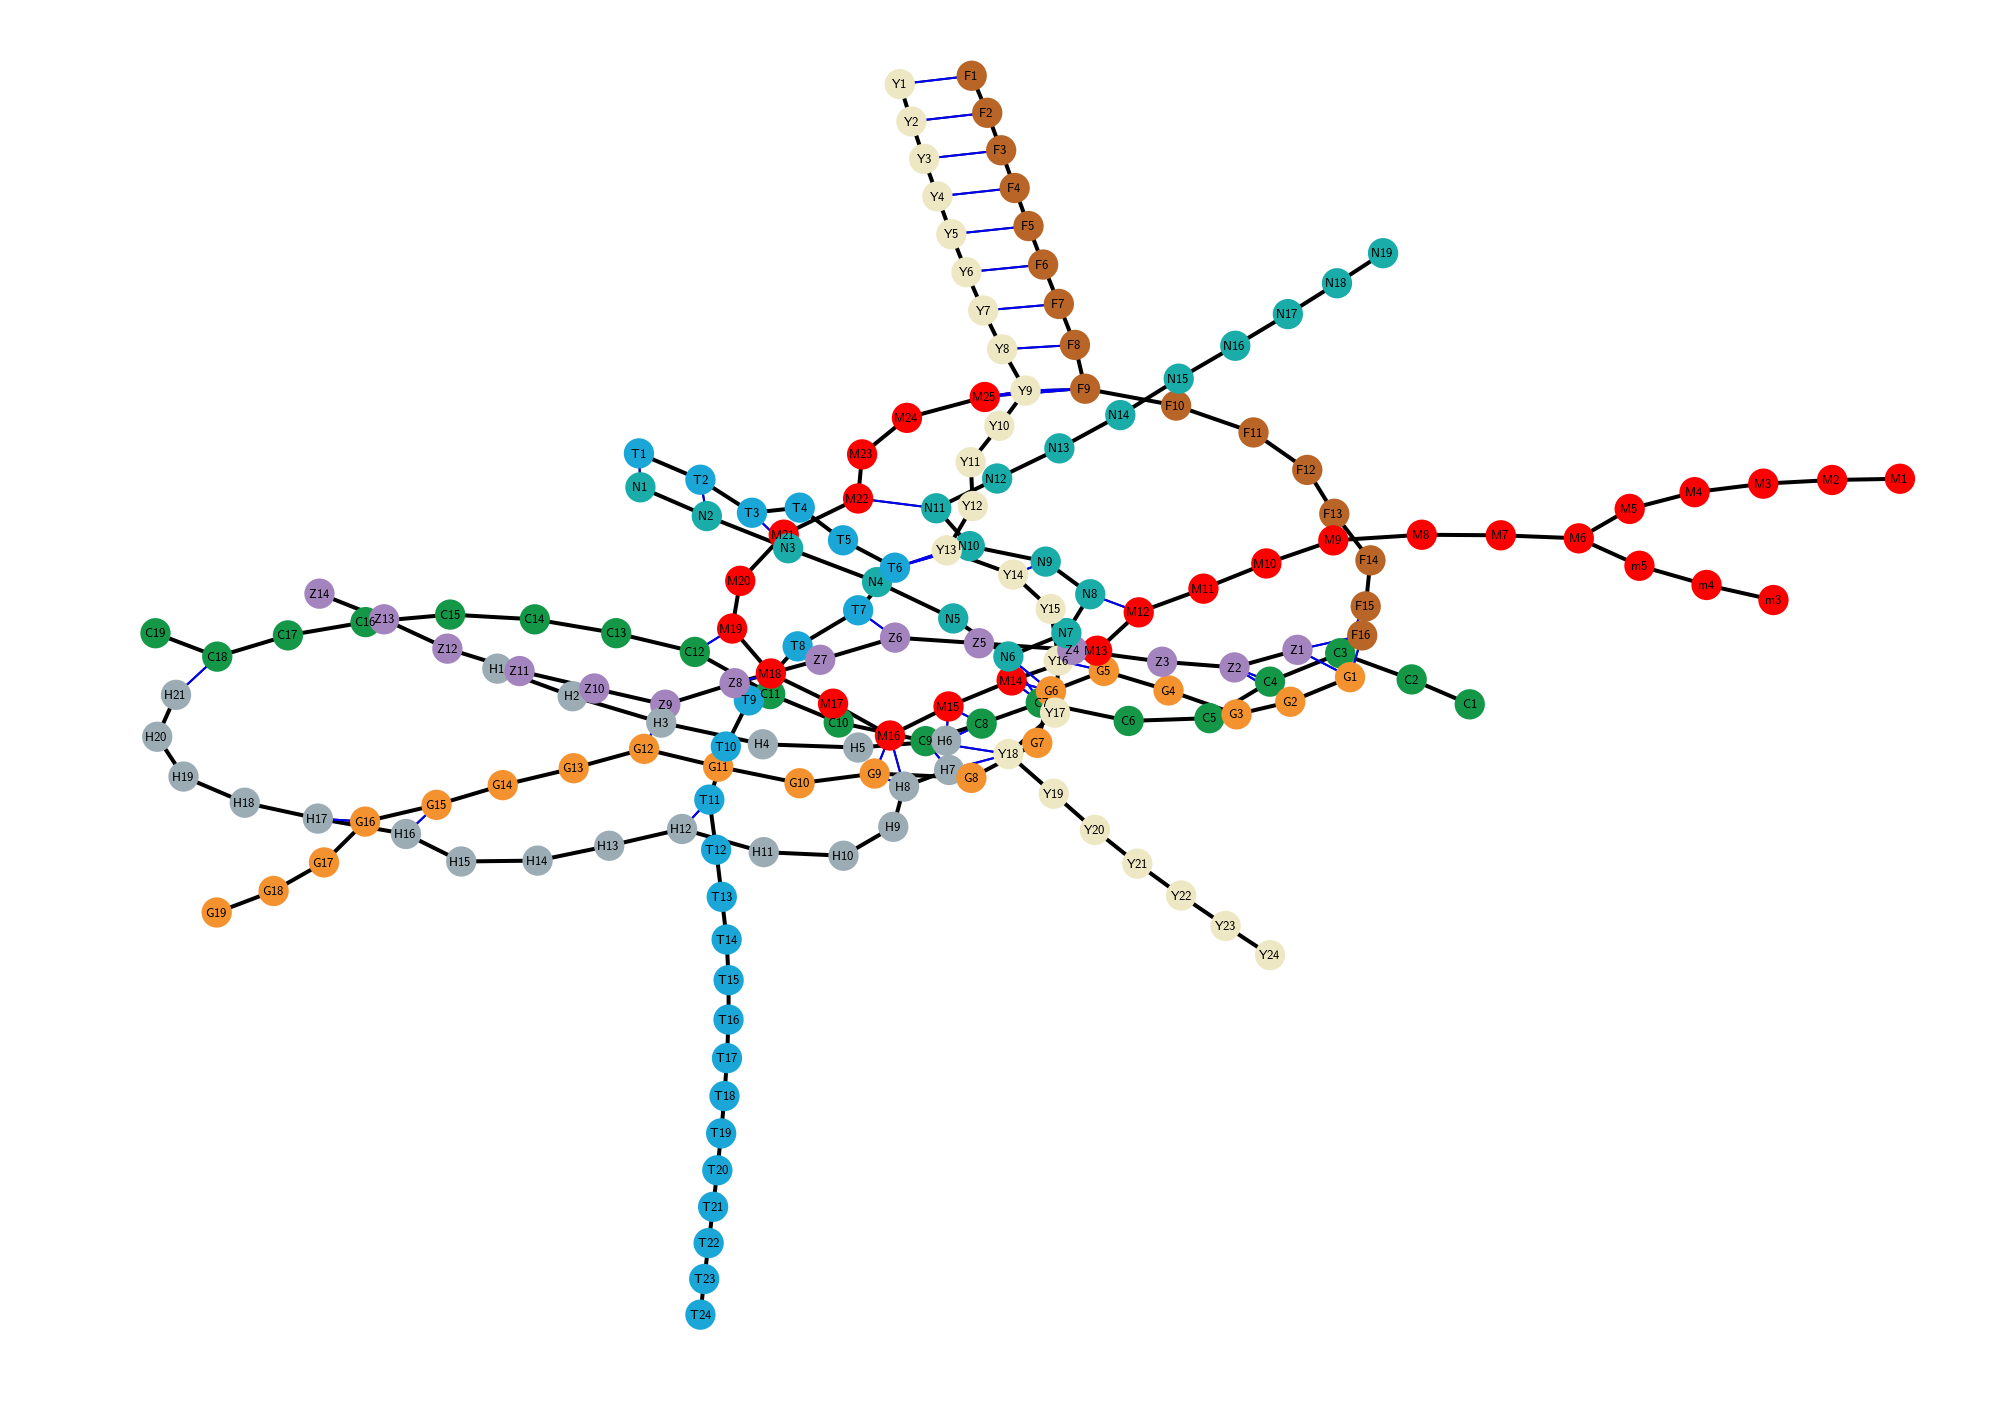

In [72]:
# visualize using Networkx library primitives (Matplotlib based)
# nx.draw = draw node
# nx.draw_networx_labels = draw node labels
# nx.draw_network_edges = draw edges

fig, ax = plt.subplots(1, 1, figsize=(14, 10))

pos = nx.drawing.nx_agraph.graphviz_layout(g, prog="neato")
nx.draw(g, pos, ax=ax, node_size=200, node_color=colors)
nx.draw_networkx_labels(g, pos=pos, ax=ax, font_size=6)
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist=on_train, width=2)
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist=on_foot, edge_color="blue")

fig.savefig("ch10-metro-graph.pdf")
fig.savefig("ch10-metro-graph.png")
fig.tight_layout()

* Once graph is constructed, use NetworkX methods for analysis

In [73]:
# degree() = number of connections to a node for each node
g.degree()

DegreeView({'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 2, 'C6': 2, 'C7': 5, 'C8': 4, 'C9': 4, 'C10': 2, 'C11': 5, 'C12': 3, 'C13': 2, 'C14': 2, 'C15': 2, 'C16': 2, 'C17': 2, 'C18': 3, 'C19': 1, 'F15': 3, 'Z2': 4, 'G2': 4, 'M14': 5, 'N6': 5, 'G6': 5, 'M15': 4, 'H6': 4, 'H7': 4, 'Y18': 4, 'T9': 5, 'M18': 5, 'Z8': 5, 'M19': 3, 'H21': 2, 'G1': 3, 'G3': 2, 'G4': 3, 'G5': 6, 'G7': 2, 'G8': 2, 'G9': 4, 'G10': 2, 'G11': 3, 'G12': 3, 'G13': 2, 'G14': 2, 'G15': 3, 'G16': 3, 'G17': 2, 'G18': 2, 'G19': 1, 'Z1': 3, 'F16': 3, 'Z3': 3, 'M13': 6, 'Y16': 6, 'Z4': 6, 'N7': 6, 'M16': 4, 'H8': 4, 'T10': 3, 'Z9': 3, 'H16': 3, 'H17': 3, 'F1': 2, 'F2': 3, 'F3': 3, 'F4': 3, 'F5': 3, 'F6': 3, 'F7': 3, 'F8': 3, 'F9': 4, 'F10': 2, 'F11': 2, 'F12': 2, 'F13': 3, 'F14': 2, 'Y1': 2, 'Y2': 3, 'Y3': 3, 'Y4': 3, 'Y5': 3, 'Y6': 3, 'Y7': 3, 'Y8': 3, 'Y9': 4, 'M25': 3, 'M9': 3, 'H1': 1, 'H2': 2, 'H3': 2, 'H4': 2, 'H5': 2, 'H9': 2, 'H10': 2, 'H11': 2, 'H12': 3, 'H13': 2, 'H14': 2, 'H15': 2, 'H18': 2, 'H19': 2, 'H20': 2, 'T1

In [75]:
# find most highly connected station
d_max = max(d for (n, d) in g.degree()); d_max

6

In [77]:
[(n, d) for (n, d) in g.degree() if d == d_max]

[('G5', 6), ('M13', 6), ('Y16', 6), ('Z4', 6), ('N7', 6)]

In [83]:
# shortest path between Y24 & C19 stations
p = nx.shortest_path(g, "Y24", "C19"); np.array(p)

array(['Y24', 'Y23', 'Y22', 'Y21', 'Y20', 'Y19', 'Y18', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19'],
      dtype='<U3')

In [84]:
# travel time (weights) from Y24 to C19 stations
np.sum([g[p[n]][p[n+1]]["weight"] 
        for n in range(len(p)-1) 
        if "weight" in g[p[n]][p[n+1]]])

35

In [85]:
# not 100% true - transfer nodes have no weights = zero transfer time (??)
# let's fix.
# first, create copy of graph.
h = g.copy()

In [86]:
# assume 5 min transfer time to any transfer node.
# iterate through edges; update those with transfer attribute set to True.

for n1, n2 in h.edges():
    if "transfer" in h[n1][n2]:
        h[n1][n2]["weight"] = 5

In [87]:
# re-run minimum travel time:
p = nx.shortest_path(h, "Y24", "C19")
np.array(p)

array(['Y24', 'Y23', 'Y22', 'Y21', 'Y20', 'Y19', 'Y18', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19'],
      dtype='<U3')

In [103]:
np.sum([h[p[n]][p[n+1]]["weight"] 
        for n in range(len(p)-1)])

85

In [88]:
# now we can find optimal path between arbitrary nodes.
p = nx.shortest_path(h, "Z1", "H16")
np.array(p)

array(['Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'G12', 'G13',
       'G14', 'G15', 'H16'], dtype='<U3')

In [89]:
# travel time, Z1 -> H16
np.sum([h[p[n]][p[n+1]]["weight"] for n in range(len(p)-1)])

65

* NetworkX representation can be converted to an adjacency matrix with __to_scipy_sparse_matrix()__, for analysis via **sp.csgraph**
* Cuthill-KcKee ordering: reorder that reduces max distance of matrix elements from the diagonal.

In [90]:
# convert Tokyo Metro to adjacency matrix
A = nx.to_scipy_sparse_matrix(g); A

<184x184 sparse matrix of type '<class 'numpy.int64'>'
	with 486 stored elements in Compressed Sparse Row format>

In [91]:
# compute adj.matrix's reverse Cuthill-McKee ordering
perm = sp.csgraph.reverse_cuthill_mckee(A)

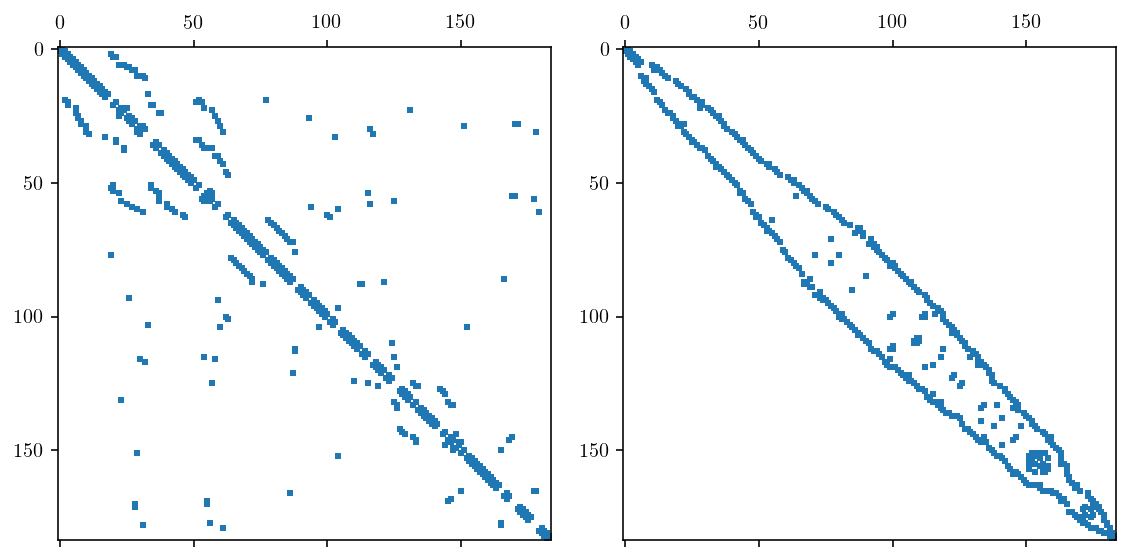

In [92]:
# visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.spy(A, markersize=2)
ax2.spy(sp_permute(A, perm, perm), markersize=2)
fig.tight_layout()
fig.savefig("ch12-rcm-graph.pdf")